In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Generating and Analyzing Imbalanced Data

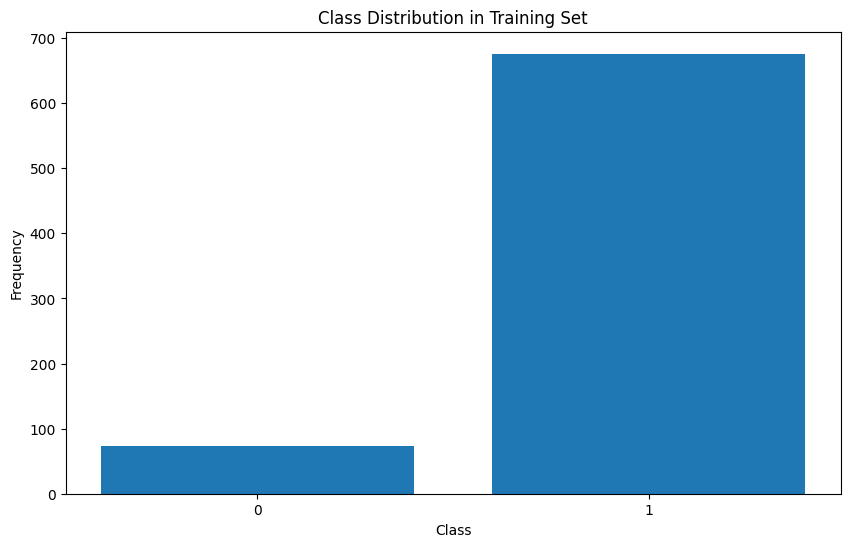

In [2]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Visualizing the class distribution
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=np.arange(-0.5, 2), rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Set')
plt.show()

Handling Imbalance with SMOTE

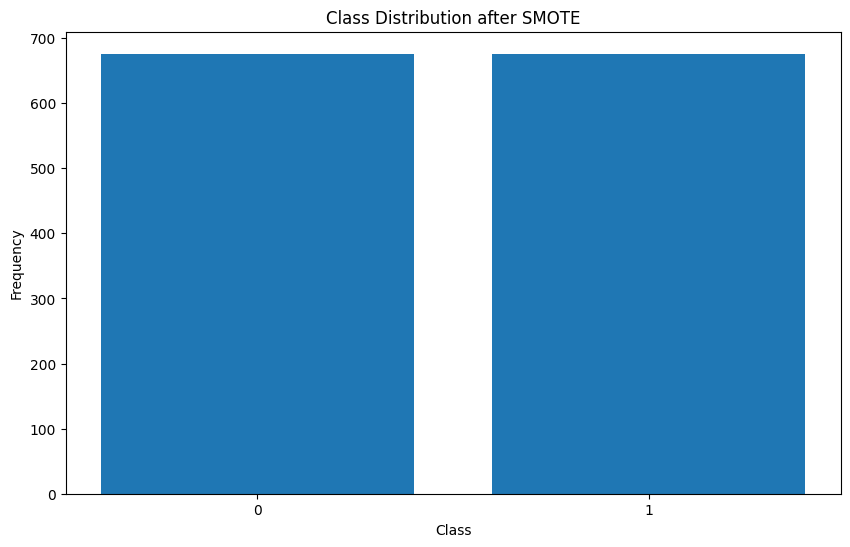

In [4]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualizing the new class distribution
plt.figure(figsize=(10, 6))
plt.hist(y_train_smote, bins=np.arange(-0.5, 2), rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution after SMOTE')
plt.show()

Training and Evaluating the Model

In [5]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

y_pred = clf.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       224

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Confusion Matrix:
 [[ 26   0]
 [  0 224]]
